# Do Asian Countries tend to have higher death rates compared to North American countries?

"Communities and countries and ultimately the world are only as strong as the health of their women."

                                                                                    - Michelle Obama

In a world where waste is abundant but need for resources is still high, humanity has a responsibility of helping thy neighbor, ensuring a better tomorrow by doing something today, especially in today's society with COVID-19. To do so, we must find out which nations/communities need the most help. 

Today, we're going to take a deep dive into Mortality Statistics. In particular, we're going to look at Crude Death Rate per 1000 people. 

Looking into Death Rate will give us a solid understanding and assessment of a nation's overall health status, especially since many Causes of Death are preventable/treatable. 

Motivation: Where should we divert global attention to? Food, water, resources, etc?

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

#Data Import from World Development Indicators DataSet
indicators = pd.read_csv('./World Indicators/Indicators.csv')

In [15]:
#Here we set up our DataFrames, filtering for country names, required features, and year. 

#List for all countries in each continent, got from wikipedia
asianCountries = ['ARB', 'ARM', 'AZE', 'BHR', 'BGD', 'BTN', 'BRN', 'KHM', 'CHN', 'TLS', 'GEO', 'IND', 'IDN', 'IRN', 'IRQ', 'ISR', 'JPN', 'JOR', 'KAZ', 'KWT', 'KGZ', 'LAO', 'LBN', 'MYS', 'MDV', 'MNG', 'MMR', 'NPL', 'PRK', 'OMN', 'PAK', 'PSE', 'PHL', 'QAT', 'RUS', 'SAU', 'SGP', 'KOR', 'LKA', 'SYR', 'TJK', 'TWN', 'THA', 'TUR', 'TKM', 'ARE', 'UZB', 'VNM', 'YEM']
northAmericanCountries = ['CAN', 'USA', 'MEX', 'BLZ', 'ATG', 'AIA', 'ABW', 'BHS', 'BRB', 'BMU', 'VGB', 'CYM', 'CRI', 'CUB', 'CUW', 'DOM', 'SLV', 'GRL', 'GRD', 'GTM', 'HTI', 'HND', 'JAM', 'MSR', 'NIC', 'PAN', 'PRI', 'BLM', 'KNA', 'LCA', 'MAF', 'SPM', 'VCT', 'SXM', 'TTO', 'TCA', 'VIR']

#DF for all indicators in NA or in ASIA
northAmericaDF = indicators[indicators['CountryCode'].isin(northAmericanCountries)]
asiaDF = indicators[indicators['CountryCode'].isin(asianCountries)]

#Masks for wanted indicators
northAmericaDeathMask = northAmericaDF['IndicatorName'].str.contains('Death rate')
asiaDeathMask = asiaDF['IndicatorName'].str.contains('Death rate')
northAmericaLifeMask = northAmericaDF['IndicatorName'].str.contains('Life expectancy at birth, total')
asiaLifeMask = asiaDF['IndicatorName'].str.contains('Life expectancy at birth, total')
northAmericaBirthMask = northAmericaDF['IndicatorName'].str.contains('Birth rate')
asiaBirthMask = asiaDF['IndicatorName'].str.contains('Birth rate')

#New DFs
northAmericaDeath = northAmericaDF[northAmericaDeathMask]
asiaDeath = asiaDF[asiaDeathMask]
northAmericaLife = northAmericaDF[northAmericaLifeMask]
asiaLife = asiaDF[asiaLifeMask]
northAmericaBirth = northAmericaDF[northAmericaBirthMask]
asiaBirth = asiaDF[asiaBirthMask]

#New DFs for strictly year 2013
northAmericaDeath2013 = northAmericaDeath[northAmericaDeath['Year'] == 2013]
asiaDeath2013 = asiaDeath[asiaDeath['Year'] == 2013]
northAmericaLife2013 = northAmericaLife[northAmericaLife['Year'] == 2013]
asiaLife2013 = asiaLife[asiaLife['Year'] == 2013]
northAmericaBirth2013 = northAmericaBirth[northAmericaBirth['Year'] == 2013]
asiaBirth2013 = asiaBirth[asiaBirth['Year'] == 2013]

## Death Rate Comparisons between the two continents

In [16]:
northAmericaDeath2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 5400420 to 5531416
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CountryName    29 non-null     object 
 1   CountryCode    29 non-null     object 
 2   IndicatorName  29 non-null     object 
 3   IndicatorCode  29 non-null     object 
 4   Year           29 non-null     int64  
 5   Value          29 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.6+ KB


In [17]:
asiaDeath2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 5377513 to 5532201
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CountryName    46 non-null     object 
 1   CountryCode    46 non-null     object 
 2   IndicatorName  46 non-null     object 
 3   IndicatorCode  46 non-null     object 
 4   Year           46 non-null     int64  
 5   Value          46 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 2.5+ KB


We see from above, that in 2013 we have more data points in Asia(46) than we do in North America(29). This would make sense, since there are more countries in Asia than in North America. 

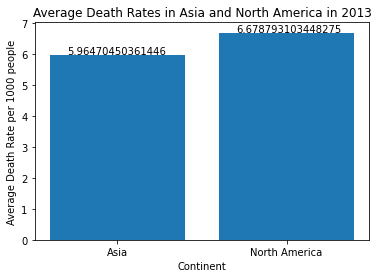

In [18]:
#Creating our first bar plot
countries = ['Asia', 'North America']
averages = [asiaDeath2013['Value'].mean(), northAmericaDeath2013['Value'].mean()]

plt.bar(countries, averages)
plt.xlabel('Continent')
plt.ylabel('Average Death Rate per 1000 people')
plt.title('Average Death Rates in Asia and North America in 2013')

xlocs, xlabs = plt.xticks()
for index, value in enumerate(averages):
    plt.text(xlocs[index] - 0.3, value + 0.01, str(value))

plt.show()

From above, we can see that in 2013, the death rate in North America is higher than it was in Asia. 

Our indicator is "Death rate, crude (per 1,000 people)". From wikipedia, this indicator "specifies the number of deaths in a population (scaled) per unit of time". This means that in 2013, more people died in North America than Asia each unit of time. Although, the difference between the two continents is less than one so it's hardly a difference. 

Let's look at the distributions of values between these two countries in 2013: 

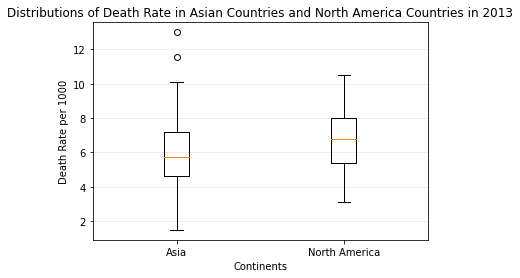

In [19]:
#Creating our first box plot
fig, ax = plt.subplots()

data = [asiaDeath2013['Value'], northAmericaDeath2013['Value']]
bp = ax.boxplot(data)

ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
ax.set_xticklabels(['Asia', 'North America'])

plt.xlabel('Continents')
plt.ylabel('Death Rate per 1000')
plt.title('Distributions of Death Rate in Asian Countries and North America Countries in 2013')
plt.show()

This box plot is also very interesting. We see the following things
* We see that the whiskers in Asia are much longer than the whiskers for North America. 
* We see that Asia has a lower minimum value than North America does. 
* We also see that Asia has 2 upper outliers, meaning two asian countries have very high death rates. 

This information can tell us 3 things: 
* We see that the range of data in Asian countries is much larger than the data in North America. The data is much more spread out. 
    * This makes sense, we have data for Asia than we do in North America, because Asia has more countries in general! 
* The minimum for Death Rate in Asian Countries is lower than the (minimum) for death rate in North America! That means that some asian countries have very low death rates, much lower than in North America. 
* When pairing the knowledge of our previous bar plot with knowing that there are 2 upper outliers in asia, we can imagine that the average values for Death Rate in Asia in 2013 would drastically decrease! Thus widening the gap between the comparisons of Average Death Rates in each continent!

Growing up in the United States from an immigrant family (from asia), I was always told that my parents immigrated here for a better life. While that could mean many things, I assumed that one of those reasons meant that the United States was the healthiest, safest country (I.E. you'll live a longer life here). From this data, we can see that that is not necessarily true.

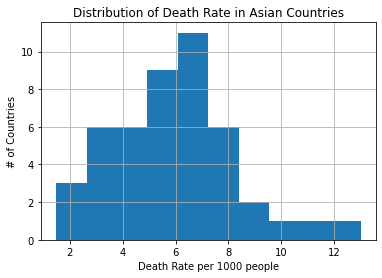

In [20]:
#Histogram for Asia 2013 Death Rate
plt.hist(asiaDeath2013['Value'])
plt.xlabel('Death Rate per 1000 people')
plt.ylabel('# of Countries')
plt.title('Distribution of Death Rate in Asian Countries')
plt.grid(True)
plt.show()

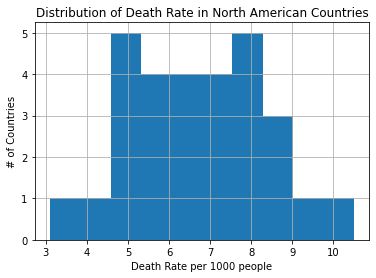

In [21]:
#Histogram for North America 2013 Death Rate
plt.hist(northAmericaDeath2013['Value'])
plt.xlabel('Death Rate per 1000 people')
plt.ylabel('# of Countries')
plt.title('Distribution of Death Rate in North American Countries')
plt.grid(True)
plt.show()

These histograms showing the distribution of these two variables obviously coincide with the box plots. We can see that the majority (11) of Asian countries have a death rate between 6 and 7. But for North America, almost all the countries have a death rate between 4.5 and 8.2, and it's almost evenly spread out. 

The histograms also show us that there are two outlier countries in Asia that have really high death rates. North America has similar outliers, but they aren't as extreme. 

All this information tells us that, while certain countries in Asia have the highest death rates in our selected pool, the majority of North American countries have higher death rates than Asian countries. 

This information can be very useful for global health initatives. For example, perhaps most North American countries need more health resources sent to them such as healthy food and clean water, while only some countries in Asia need this extra help. 

From here, additional research needs to be done to see what has the most influence to a high/low death rate. Perhaps more access to health care will cause a decrease in death rate, or increasing the overall food quality, or lowering the frequency of violent crimes. 